# Visualize sample exported image
Nachat Jatusripitak

In [ ]:
# Import required packages
import rasterio
import numpy as np
import matplotlib.pyplot as plt

Metadata: {'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 44, 'height': 44, 'count': 10, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 47N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",99],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32647"]]'), 'transform': Affine(11131.949079327358, 0.0, 333958.47237982077,
       0.0, -11131.949079327358, 2348841.2557380726)}
Number of Bands: 10
Dimensions (Height, Width): (44, 44)
CRS: EPSG:32647
Number of Bands: 10
Band Names: ['pm25_today', 'u_wind_10m', 'v_wind_10m', 'dew_

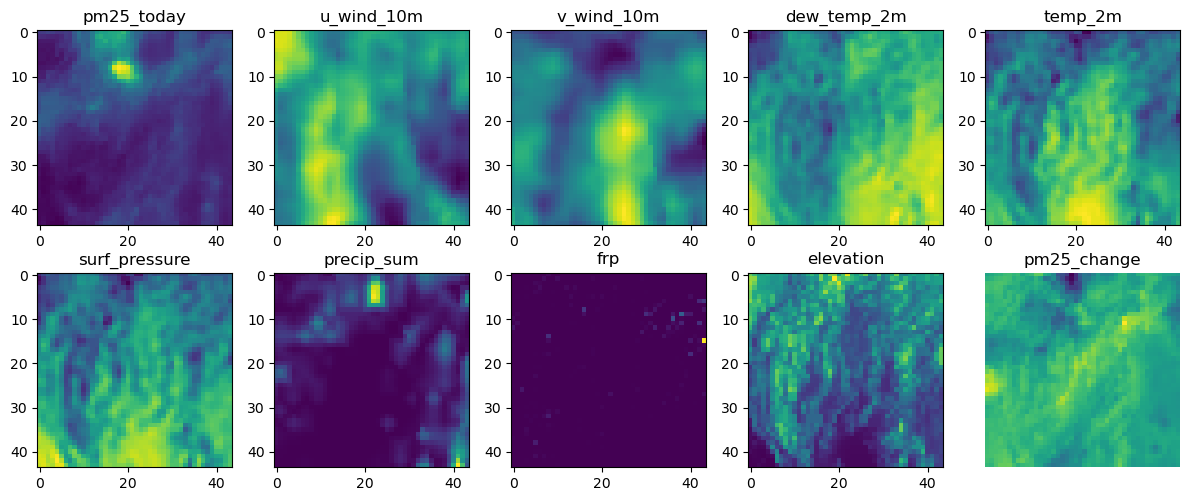

In [2]:
# Open the GeoTIFF file
with rasterio.open('../dataset_1/dataset_1_2020-03-21.tif') as src:
    print("Metadata:", src.meta)
    print("Number of Bands:", src.count)
    print("Dimensions (Height, Width):", (src.height, src.width))
    print("CRS:", src.crs)

    # Get the number of bands
    num_bands = src.count
    print("Number of Bands:", num_bands)

    # Get descriptions for each band (if available)
    band_names = [src.descriptions[i] if src.descriptions[i] else f'Band_{i+1}' for i in range(num_bands)]
    print("Band Names:", band_names)

    fig, axes = plt.subplots(2, 5)

    fig.set_figwidth(12)
    fig.set_figheight(5)

    for i in range(0, num_bands):
      band = src.read(i + 1)
      print(f'\n{band_names[i]}')
      # Check statistics
      print("Band Statistics:")
      print("Min:", np.min(band), "Max:", np.max(band), "Mean:", np.mean(band))

      # Visualize
      axes[i // 5, i % 5].imshow(band, cmap='viridis')
      axes[i // 5, i % 5].set_title(f"{src.descriptions[i]}")
    plt.axis('off')
    plt.tight_layout()
    plt.show()